<img src="./titanic_main.png">

### 1. Problem definition: 

If data science, big data, machine learning, predictive analytics, business intelligence, or any other buzzword is the solution, then what is the problem? Too often we are quick to jump on the new shiny technology, tool, or algorithm before determining the actual problem we are trying to solve. In this case, we are trying to predict the survivability of a person in the Titanic disaster based on a few features. What model or algorithm we are going to use? That's a concern at the later stage of the pipeline.

We will use the popular scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import matplotlib #collection of functions for scientific and publication-ready visualization
import numpy as np #foundational package for scientific computing
import scipy as sp #collection of functions for scientific computing and advance mathematics
import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
import sklearn #collection of machine learning algorithms

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


### 2. Gathering and Preparing data:

This step is nothing but data wrangling, a required process to turn “wild” data into “manageable” data. We are using the <a href="https://www.kaggle.com/c/titanic/data">Titanic: Machine Learning from Disaster</a>. To begin this step, we first import our data. Next we use the info() and sample() function, to get a quick and dirty overview of variable datatypes (i.e. qualitative vs quantitative).

In [2]:
df_train = pd.read_csv("./Titanic-data/train.csv")
df_test = pd.read_csv("./Titanic-data/test.csv")

print (df_train.info())

df_train.sample(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,NaN,C
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S


#### 2.1 Insights about the columns:

1. The **Survived** variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables.

2. The **PassengerID** and **Ticket** variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.

3. The **Pclass** variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.

4. The **Name** variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.

5. The **Sex** and **Embarked** variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.

6. The **Age** and **Fare** variable are continuous quantitative datatypes.

7. The **SibSp** represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.

8. The **Cabin** variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.

In [3]:
print('Train columns with null values:\n', "-"*30)
print(df_train.isnull().sum()*100/len(df_train))

print("-"*30)
print("-"*30)

print('Test columns with null values:\n', "-"*30)
print(df_test.isnull().sum()*100/len(df_train))
print("-"*30)

Train columns with null values:
 ------------------------------
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
------------------------------
------------------------------
Test columns with null values:
 ------------------------------
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64
------------------------------


Seeing these many values as **Null/NA**, we should attend to these first so as to get correct predictions from the model. Imputing **median** values for the **Fare**, and **Age** would ensure no impact from the outlier values in our dataset. **Mode** values for the categorical datatypes such as **Cabin** and **Embarked** would help us not to make any false assumptions and would just allot the maximum occurence subtype to the missing values.

In [4]:
available_data = [df_train,df_test]

for dataset in available_data:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
    #complete cabin with mode
    dataset['Cabin'].fillna(dataset['Cabin'].mode()[0], inplace = True)
    

#### 2.2 Feature Engineering on our dataset:

<a href="https://en.wikipedia.org/wiki/Feature_engineering">Feature engineering</a> is about creating new input features from your existing ones. It is the process of using domain knowledge of the data to create features that make machine learning algorithms work. We could say the better the features are, the better the result is. This isn't entirely true, because the results achieved also depend on the model and the data, not just the chosen features. That said, choosing the right features is still very important. Better features can produce simpler and more flexible models, and they often yield better results.



In [5]:
def age_map(x):
    if(x <= 12):
        return "Kid"
    elif(x >= 13 and x <= 19):
        return "Teen"
    elif(x >= 19 and x < 70):
        return "Adult"
    else:
        return "Senior"

for dataset in available_data:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = dataset['Age'].apply(lambda x: age_map(x))

    dataset['Cabin'] = dataset['Cabin'].apply(lambda x: x[0][:1])
    
    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (df_train['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
df_train['Title'] = df_train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(df_train['Title'].value_counts())
print("-"*10)



Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------


In [6]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in available_data:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
df_train_x = ['Sex','Pclass', 'Cabin','Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
df_train_x_calc = ['Sex_Code','Pclass', 'Cabin','Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
df_train_xy =  Target + df_train_x
print('Original X Y: ', df_train_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
df_train_x_bin = ['Sex_Code','Pclass','Cabin', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
df_train_xy_bin = Target + df_train_x_bin
print('Bin X Y: ', df_train_xy_bin, '\n')


#define x and y variables for dummy features original
df_train_dummy = pd.get_dummies(df_train[df_train_x])
df_train_x_dummy = df_train_dummy.columns.tolist()
df_train_xy_dummy = Target + df_train_x_dummy
print('Dummy X Y: ', df_train_xy_dummy, '\n')



df_train_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Cabin', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Cabin', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Cabin_A,...,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [7]:
for x in df_train_x:
    if df_train[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(df_train[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*35, '\n')
        

#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
print('Survival Correlation by: Title')
print(pd.crosstab(df_train['Title'],df_train[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
----------------------------------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
----------------------------------- 

Survival Correlation by: Cabin
  Cabin  Survived
0     A  0.466667
1     B  0.328338
2     C  0.593220
3     D  0.757576
4     E  0.750000
5     F  0.615385
6     G  0.500000
7     T  0.000000
----------------------------------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
----------------------------------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
----------------------------------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5 

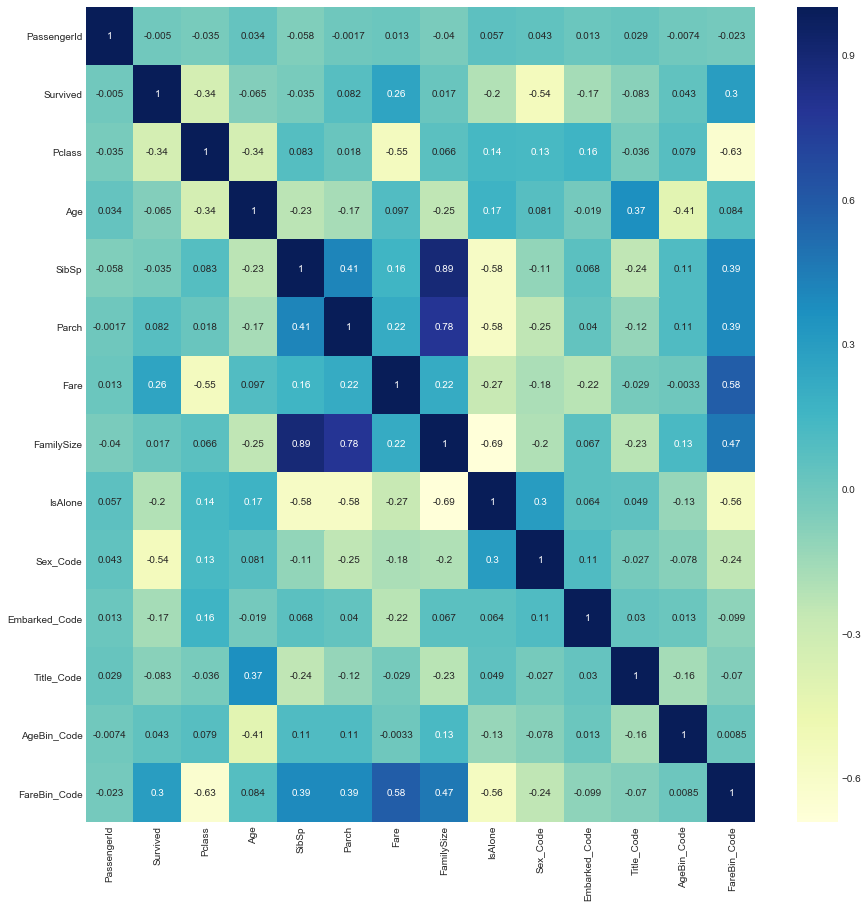

In [8]:
#plotting a heatmap of the train set

plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")

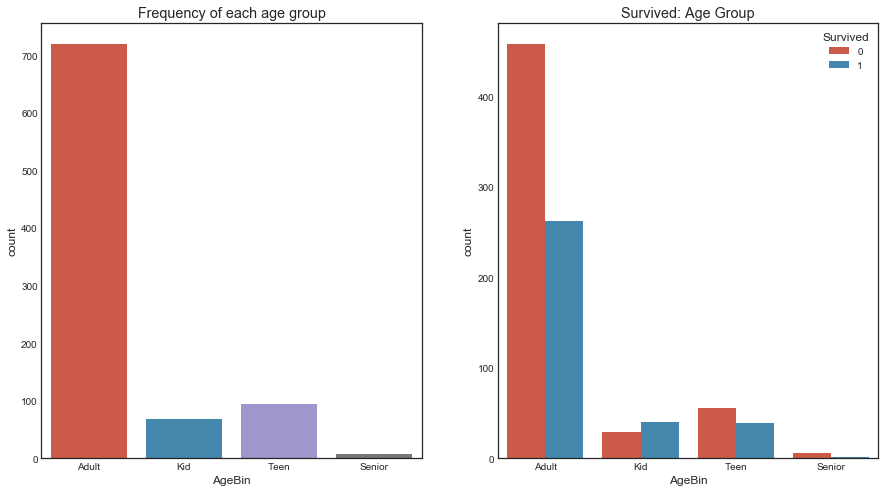

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
sns.countplot(df_train['AgeBin'], data=df_train, ax=ax[0])
sns.countplot(df_train['AgeBin'], hue='Survived', data=df_train, ax=ax[1])
ax[0].title.set_text("Frequency of each age group")
ax[1].title.set_text("Survived: Age Group")

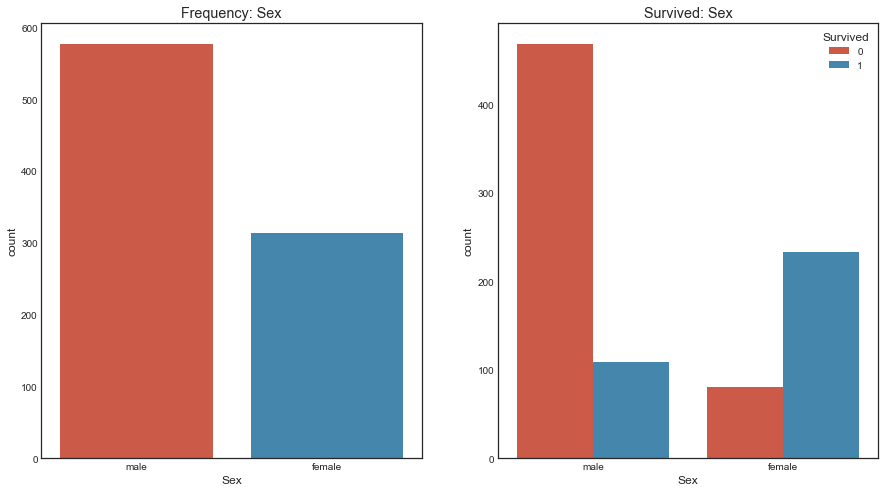

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.countplot(df_train['Sex'], data=df_train, ax=ax[0])
sns.countplot(df_train['Sex'], hue='Survived', data=df_train, ax=ax[1])
ax[0].title.set_text("Frequency: Sex")
ax[1].title.set_text("Survived: Sex")

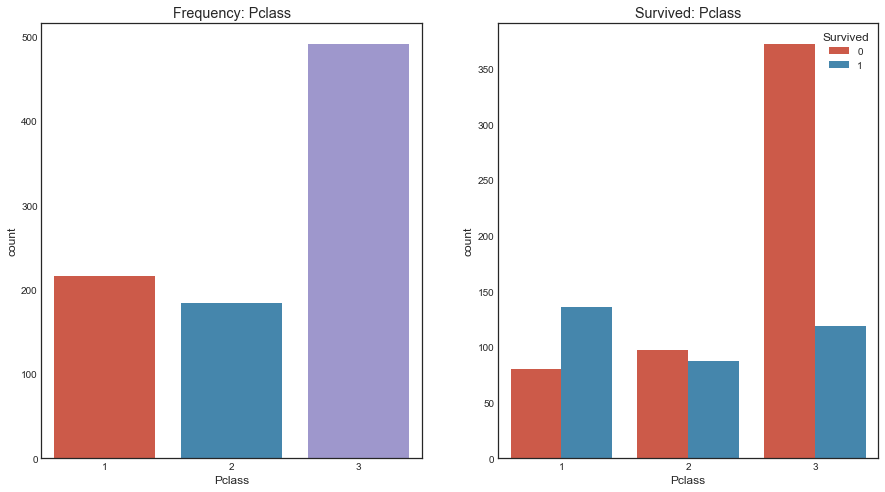

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.countplot(df_train['Pclass'], data=df_train, ax=ax[0])
sns.countplot(df_train['Pclass'], hue='Survived', data=df_train, ax=ax[1])
ax[0].title.set_text("Frequency: Pclass")
ax[1].title.set_text("Survived: Pclass")

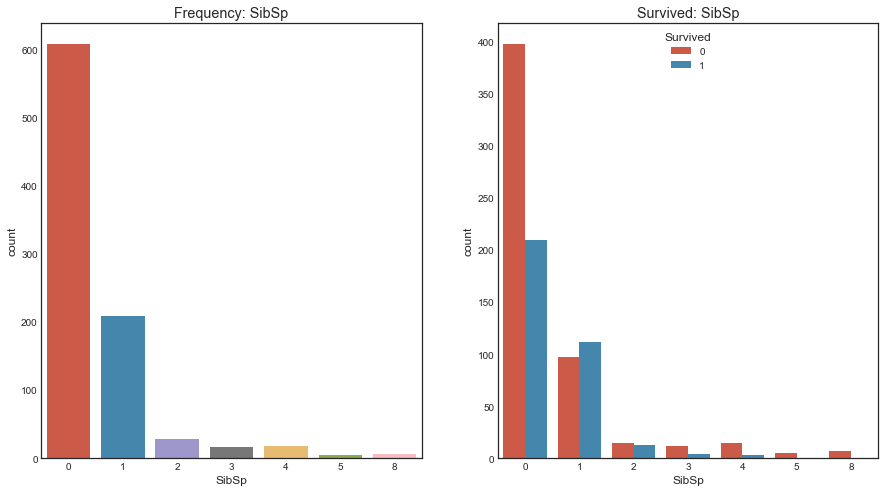

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.countplot(df_train['SibSp'], data=df_train, ax=ax[0])
sns.countplot(df_train['SibSp'], hue='Survived', data=df_train, ax=ax[1])
ax[0].title.set_text("Frequency: SibSp")
ax[1].title.set_text("Survived: SibSp")

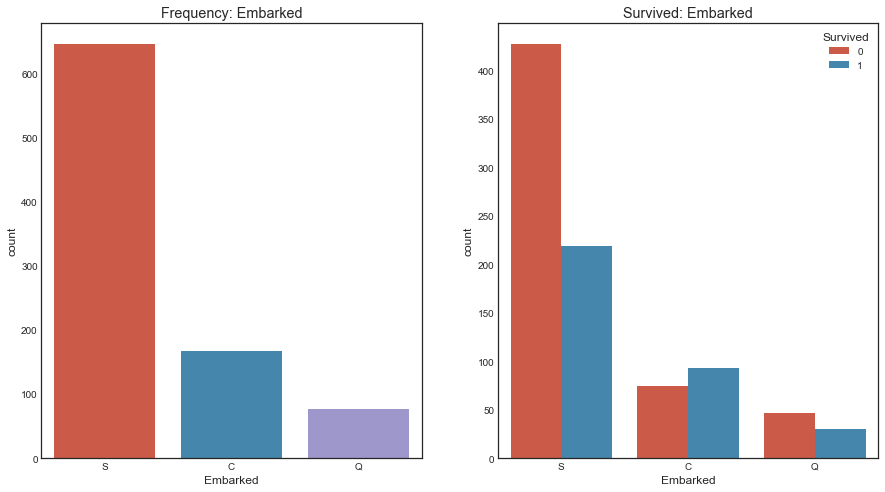

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.countplot(df_train['Embarked'], data=df_train, ax=ax[0])
sns.countplot(df_train['Embarked'], hue='Survived', data=df_train, ax=ax[1])
ax[0].title.set_text("Frequency: Embarked")
ax[1].title.set_text("Survived: Embarked")

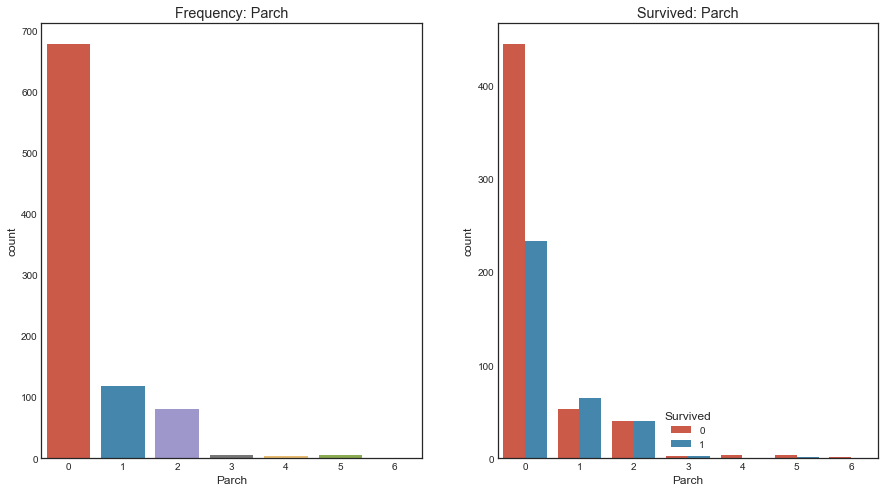

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.countplot(df_train['Parch'], data=df_train, ax=ax[0])
sns.countplot(df_train['Parch'], hue='Survived', data=df_train, ax=ax[1])
ax[0].title.set_text("Frequency: Parch")
ax[1].title.set_text("Survived: Parch")

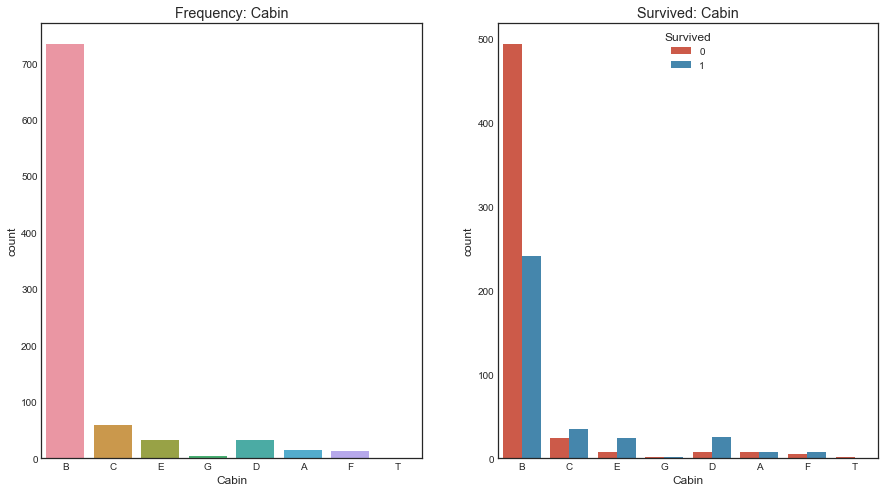

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.countplot(df_train['Cabin'], data=df_train, ax=ax[0])
sns.countplot(df_train['Cabin'], hue='Survived', data=df_train, ax=ax[1])
ax[0].title.set_text("Frequency: Cabin")
ax[1].title.set_text("Survived: Cabin")

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

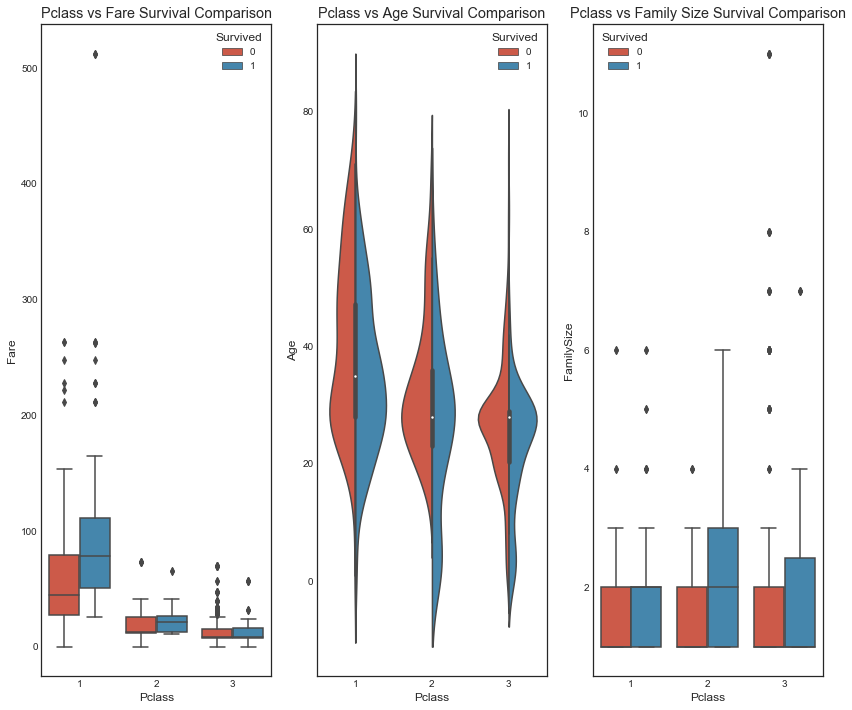

In [16]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = df_train, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df_train, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = df_train, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

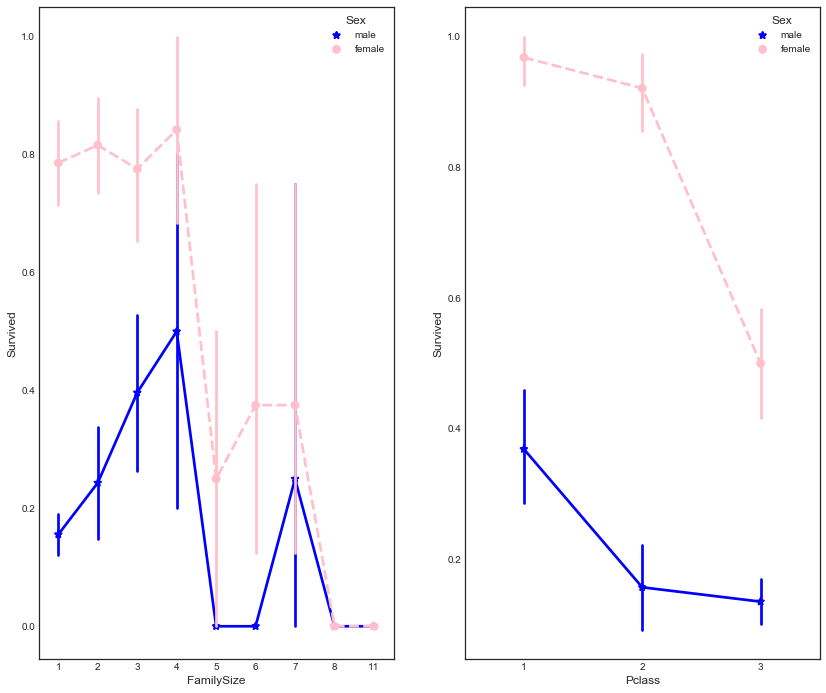

In [17]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=df_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=df_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

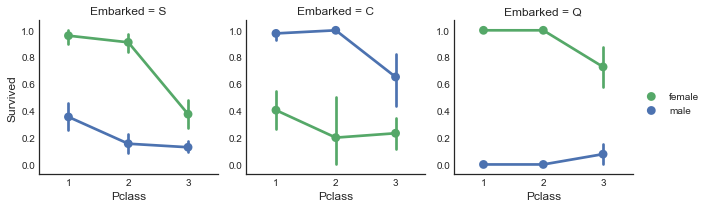

In [18]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(df_train, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

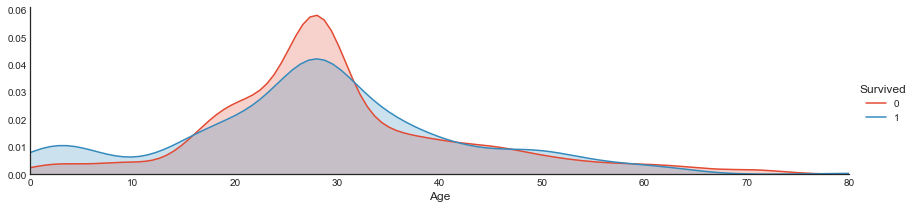

In [19]:
a = sns.FacetGrid( df_train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , df_train['Age'].max()))
a.add_legend()

In [26]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


In [28]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'Title', 'FareBin', 'AgeBin', 'Sex_Code', 'Embarked_Code', 'Title_Code',
       'AgeBin_Code', 'FareBin_Code'],
      dtype='object')

In [38]:
df_train.FamilySize.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [40]:
kfold = StratifiedKFold(n_splits=10)

x = ['Sex_Code', 'Embarked_Code', 'Title_Code','AgeBin_Code', 'FareBin_Code','FamilySize']
y = ['Survived']

X_train = df_train[x]
Y_train = df_train[y]

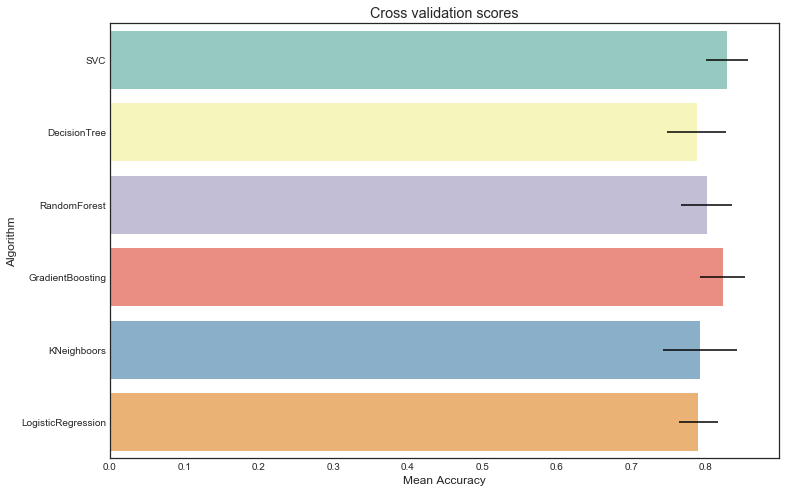

In [42]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree",
"RandomForest","GradientBoosting","KNeighboors","LogisticRegression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [44]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 6],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   22.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   48.1s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   58.5s finished


0.8271604938271605

In [45]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   20.3s finished


0.7901234567901234

In [46]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 273 out of 280 | elapsed:   16.1s remaining:    0.4s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   16.5s finished


0.8260381593714927

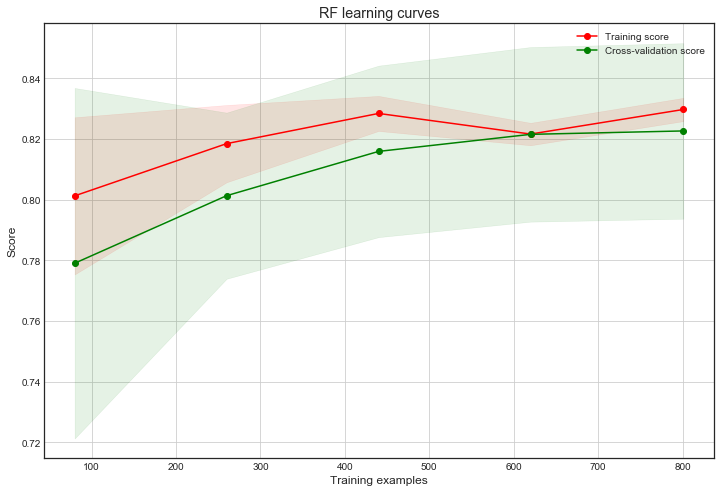

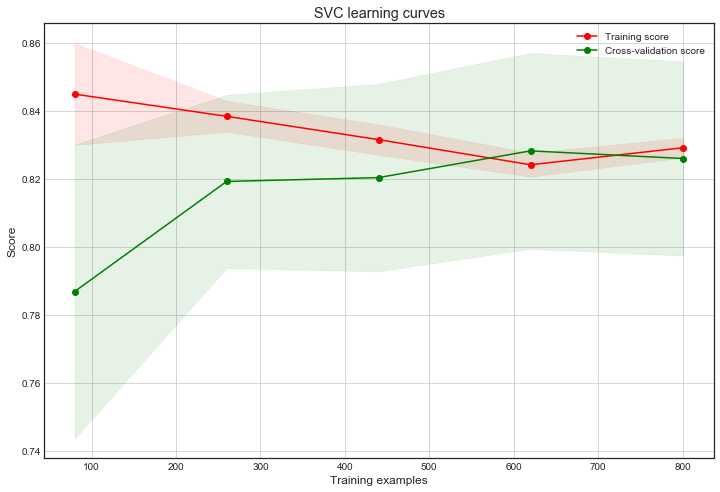

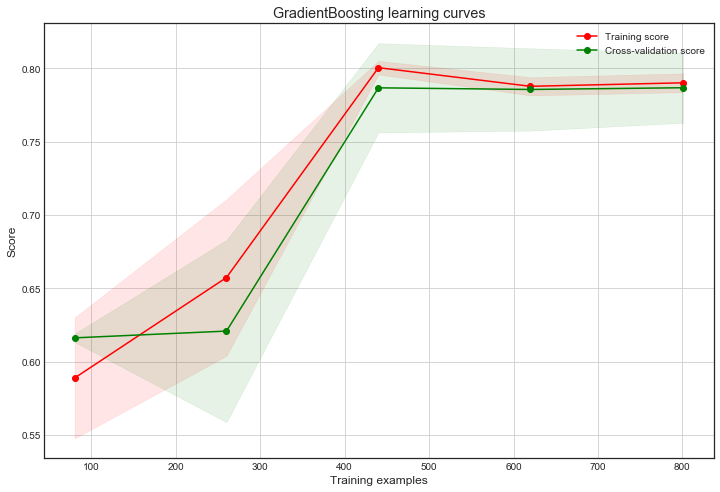

In [48]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

TypeError: 'AxesSubplot' object does not support indexing

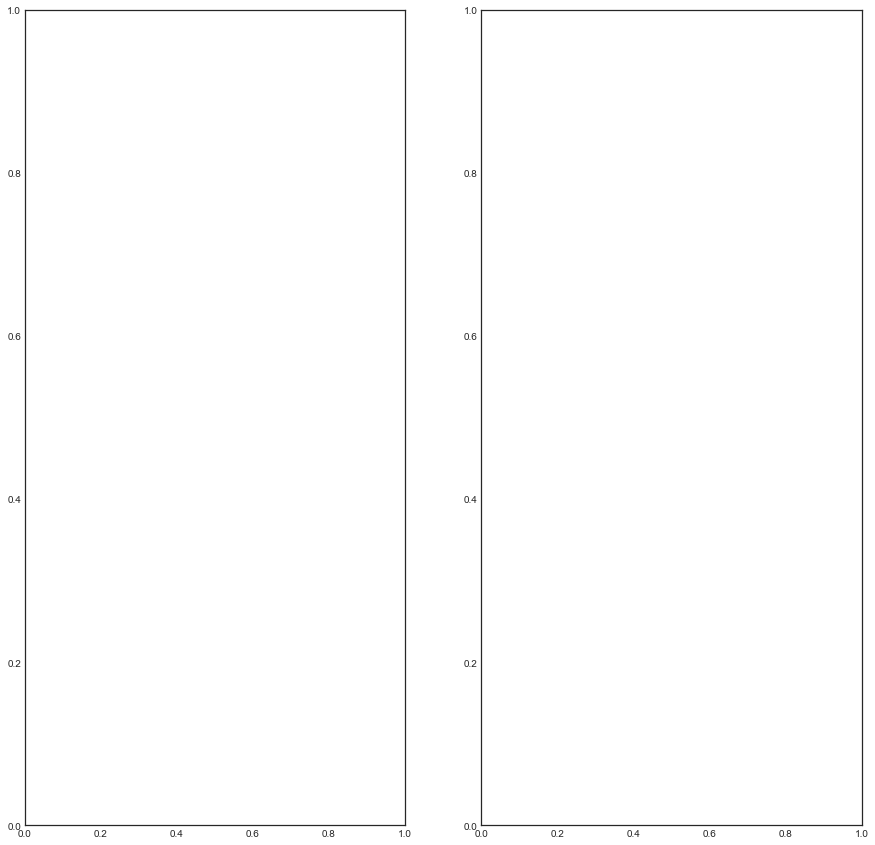

In [56]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0

for col in range(ncols):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[nrows][col])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

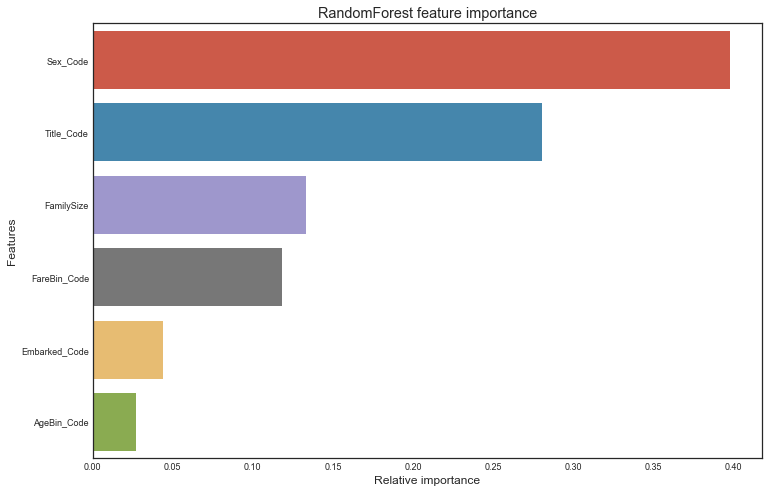

In [57]:
names_classifiers = [("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

name = names_classifiers[0][0]
classifier = names_classifiers[0][1]
indices = np.argsort(classifier.feature_importances_)[::-1][:40]
g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title(name + " feature importance")
nclassifier += 1

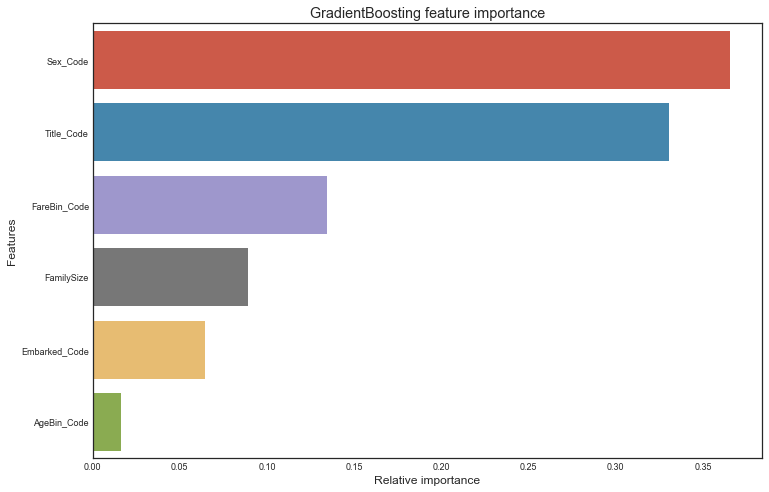

In [58]:
names_classifiers = [("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

name = names_classifiers[1][0]
classifier = names_classifiers[1][1]
indices = np.argsort(classifier.feature_importances_)[::-1][:40]
g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title(name + " feature importance")
nclassifier += 1